# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
import math

import warnings
warnings.filterwarnings("ignore")

In [159]:
# variables
season_list = {
    0:'Spring',
    1:'Summer',
    3:'Fall',
    4:'Winter'
}

weather_list = {
    1:'Clear',
    2:'Scattered Clouds',
    3:'Broken Clouds',
    4:'Cloudy',
    7:'Rain/ light Rain shower/ Light rain ',
    10:'Rrain with thunderstorm ',
    26:'Snowfall ',
    94:'Freezing Fog'    
}

is_weekend = {
    0:'weekday',
    1:'weekend'
}

is_holiday = {
    0:'non holiday',
    1:'holiday'
}

### Read dataset

In [160]:
df = pd.read_csv('store_sharing.csv')

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 2.Check missing values and if there are any dublicate rows or not.

In [161]:
# Check the missing values
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [162]:
# Check the duplicated rows
df.duplicated().sum()

0

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### 3.Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)

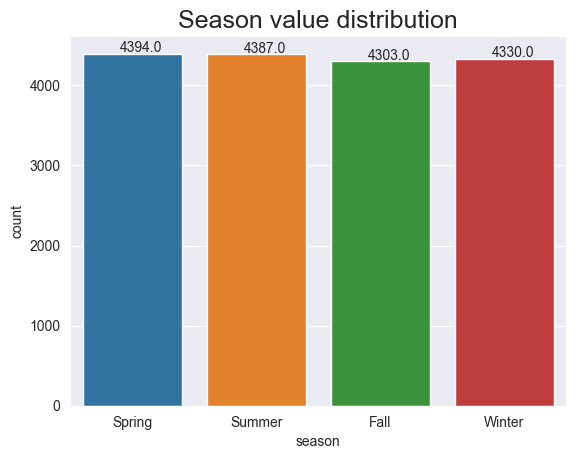

In [164]:
# season

fig, ax = plt.subplots()

sns.countplot(x='season', data=df);

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+20));

ax.set_xticklabels(season_list.values(), rotation=0)
ax.set_title("Season value distribution",size=18);

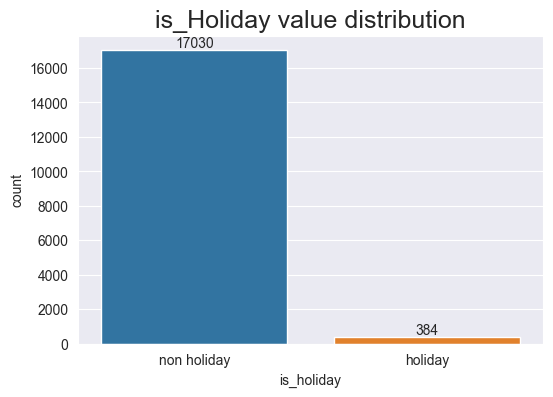

In [165]:
# is_holiday
plt.figure(figsize=(6, 4))
plot = sns.countplot(x='is_holiday', data=df)
plot.bar_label(plot.containers[0], fmt='%d')
plot.set_xticklabels(is_holiday.values())
plot.set_title("is_Holiday value distribution",size=18);

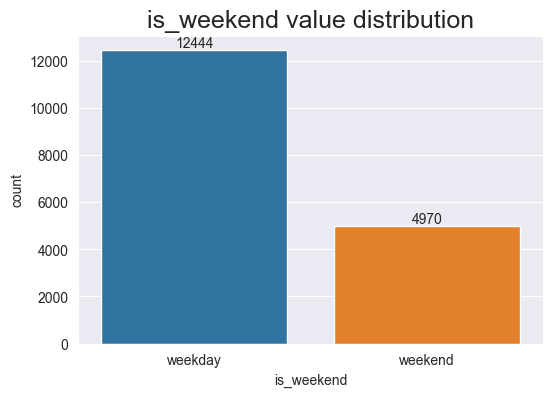

In [166]:
# is_weekend
plt.figure(figsize=(6, 4))
plot = sns.countplot(x='is_weekend', data=df)
plot.bar_label(plot.containers[0], fmt='%d')
plot.set_xticklabels(is_weekend.values())
plot.set_title("is_weekend value distribution",size=18);

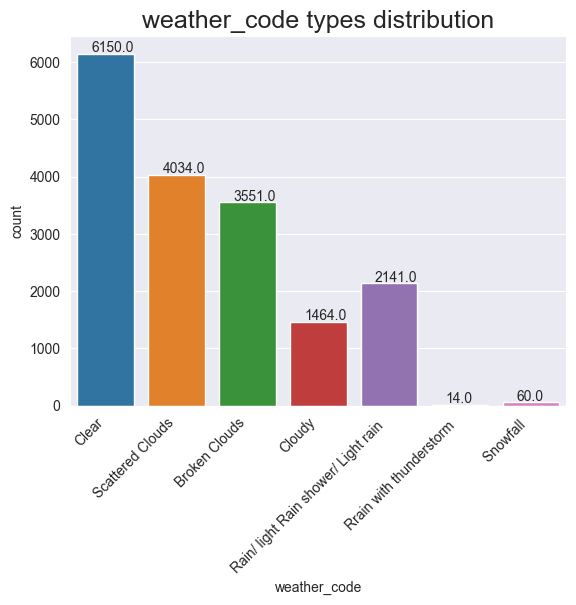

In [167]:
# weather_code
# **"weather_code" category description:**
# * 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
# * 2 = scattered clouds / few clouds 
# * 3 = Broken clouds 
# * 4 = Cloudy 
# * 7 = Rain/ light Rain shower/ Light rain 
# * 10 = rain with thunderstorm 
# * 26 = snowfall 
# * 94 = Freezing Fog

fig, ax = plt.subplots()
sns.countplot(x='weather_code',data=df);

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+30));

ax.set_xticklabels(list(weather_list.values())[:-1])
plt.xticks(rotation=45, ha='right');

ax.set_title("weather_code types distribution",size=18);

### 4.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [168]:
df.set_index('timestamp',inplace=True)
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

### 5.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

- Timestamp is exactly two years. You can do feature engineering using the `year, month, day_of_month, day_of_week, hour` in the timestamp.

In [169]:
df.insert(0,'year_month','')
df.insert(1,'year','')
df.insert(2,'month','')
df.insert(3,'day_of_month','')
df.insert(4,'day_of_week','')
df.insert(5,'hour','')

In [170]:
f = lambda x: x.strftime('%Y-%m') # strftime works with array

df['year_month'] = f(df.index)
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day_of_month'] = pd.DatetimeIndex(df.index).day
df['day_of_week'] = pd.DatetimeIndex(df.index).weekday
df['hour'] = pd.DatetimeIndex(df.index).hour
df

,year_month,year,month,day_of_month,day_of_week,hour,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01,2015,1,4,6,0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01,2015,1,4,6,1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01,2015,1,4,6,2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01,2015,1,4,6,3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01,2015,1,4,6,4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01,2017,1,3,1,19,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01,2017,1,3,1,20,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01,2017,1,3,1,21,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


### 6.Visualize the correlation with a heatmap

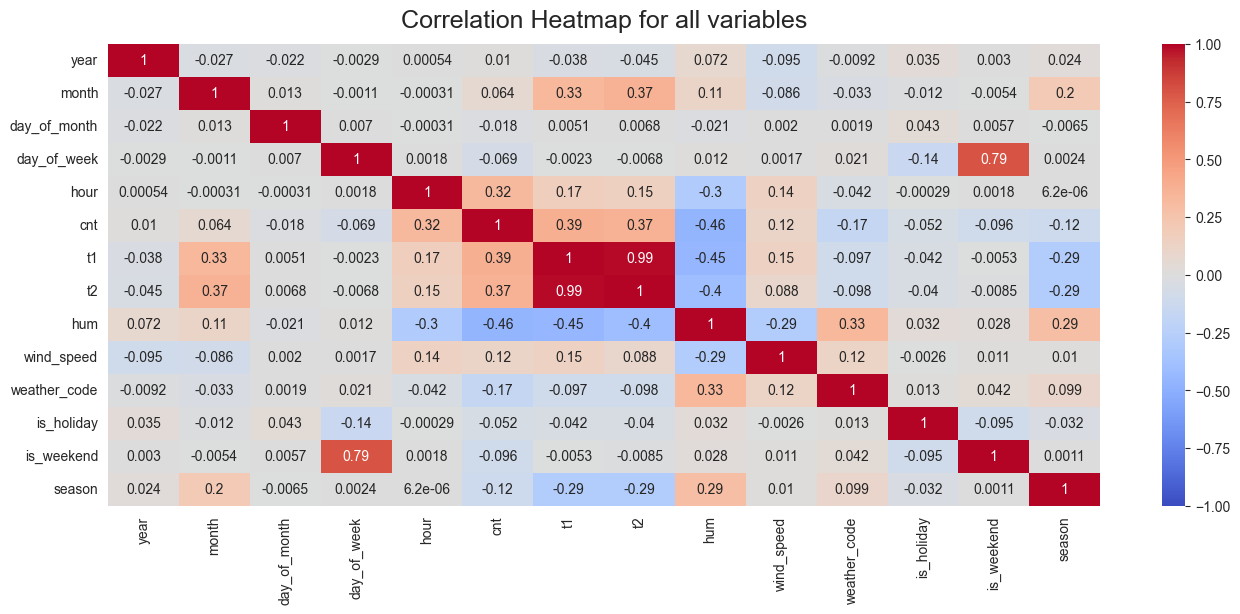

In [171]:
# for all variables 
df1 = df.loc[:, df.columns!='year_month']
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap for all variables', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Correlation Heatmap for Bike Share Count')

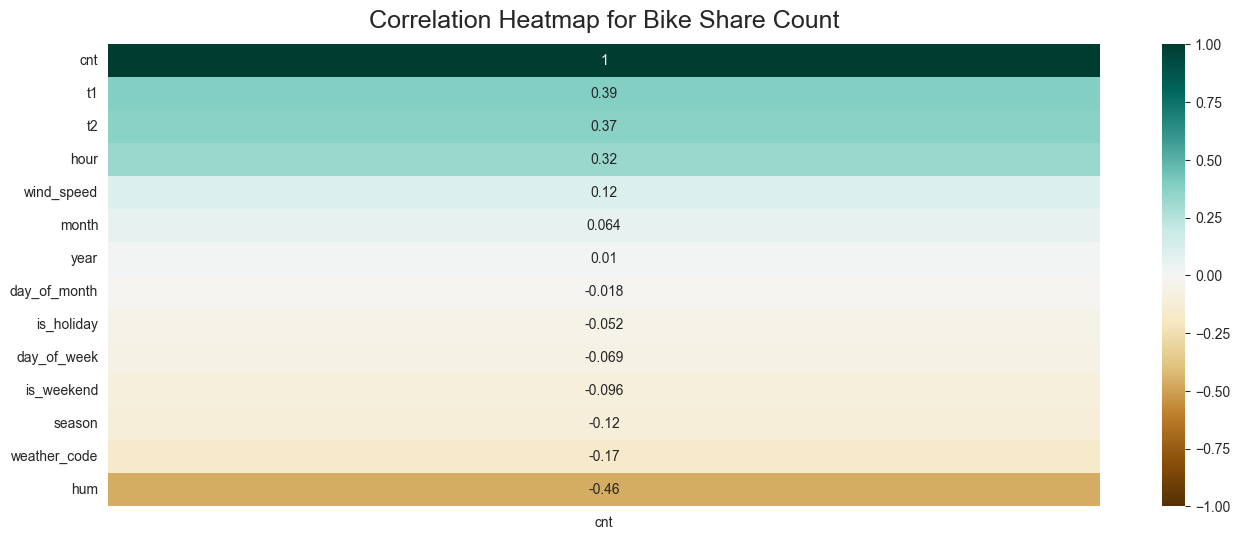

In [172]:
# for 'cnt'
cnt_cor = df1.corr()[['cnt']].sort_values(by='cnt', ascending=False)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cnt_cor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for Bike Share Count',
                  fontdict={'fontsize': 18}, pad=12)


### 7.Visualize the correlation of the target variable and the other features with barplot

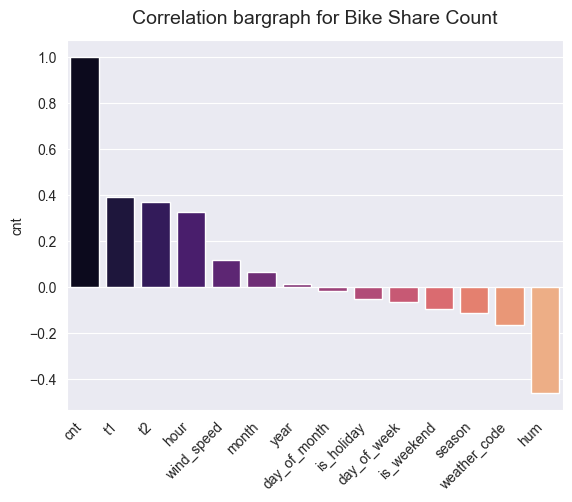

In [173]:
#with pandas

palette = sns.color_palette('magma', 16)

ax = sns.barplot(
     x= cnt_cor.index, 
     y= "cnt", 
     data= cnt_cor, 
     #hue="color",
     palette= palette
)

plt.xticks(rotation=45, ha='right');


ax.set_title('Correlation bargraph for Bike Share Count', fontdict={'fontsize':14}, pad=12);

### 8.Plot bike shares over time using lineplot

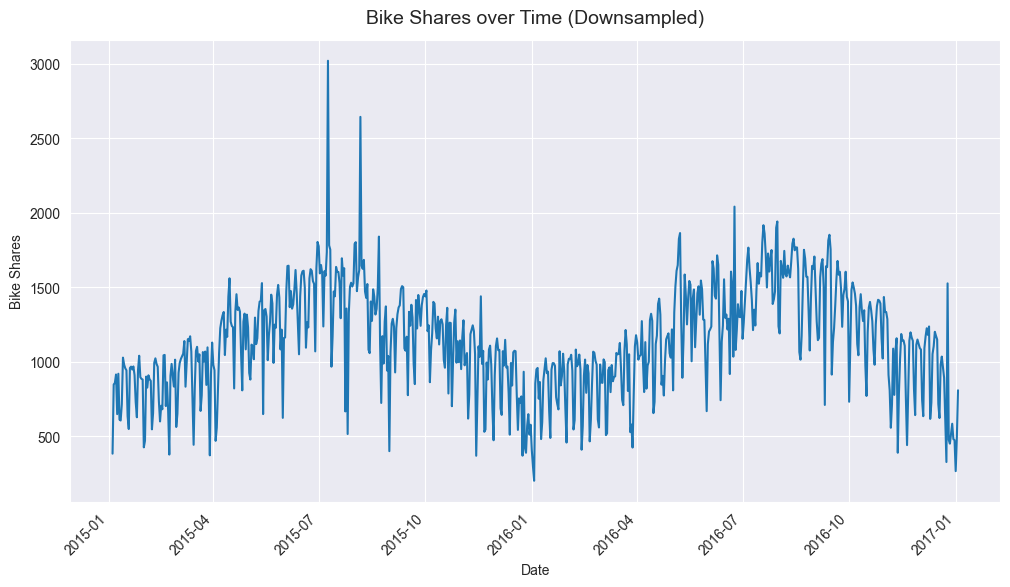

In [174]:
plt.figure(figsize=(12, 6))
df_resampled= df1.resample('1D').mean()

# Plot the lineplot.
ax= sns.lineplot(x='timestamp', y='cnt', data=df_resampled)
# ax.set_title('Bike shares over time', fontdict={'fontsize':14}, pad=12);
plt.title('Bike Shares over Time (Downsampled)', fontdict={'fontsize':14}, pad=12)
plt.xlabel('Date')
plt.ylabel('Bike Shares')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right');

# Display the plot
plt.show()

### 9.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [175]:
df.head()
df_sum = pd.DataFrame(df.groupby('year_month').cnt.sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


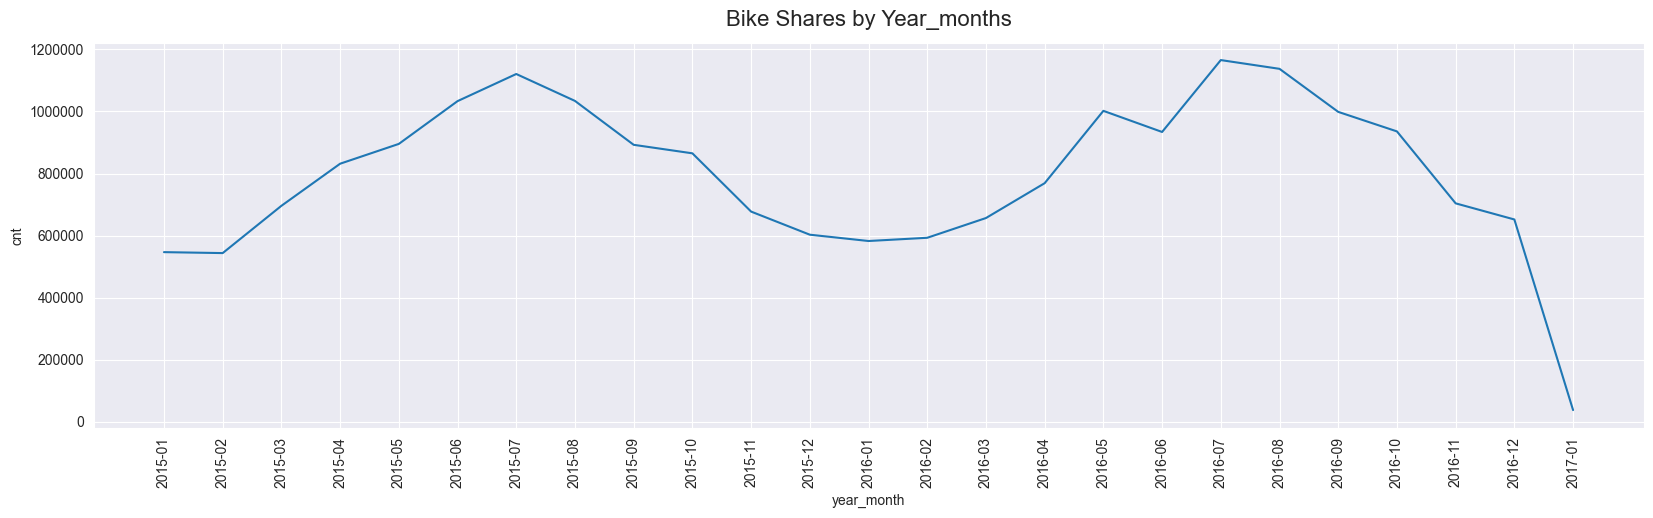

In [176]:
# with lineplot

plt.figure(figsize=(20, 5))

sns.lineplot(x='year_month', y='cnt', data=df_sum)
plt.title('Bike Shares by Year_months', fontdict={'fontsize':16}, pad=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90);

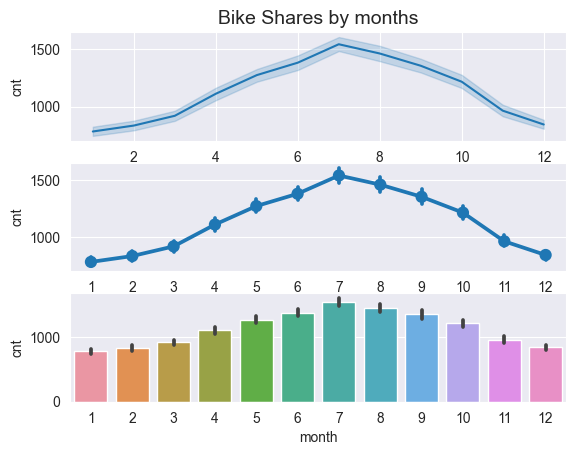

In [177]:
# with lineplot
fig, axs = plt.subplots(3)

sns.lineplot(x='month', y='cnt', data=df, ax=axs[0])
sns.pointplot(x='month', y='cnt', data=df, ax=axs[1])
sns.barplot(x='month', y='cnt', data=df, ax=axs[2])
axs[0].set_title('Bike Shares by months', fontdict={'fontsize':14});

In [178]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

In [179]:
# with pointplot



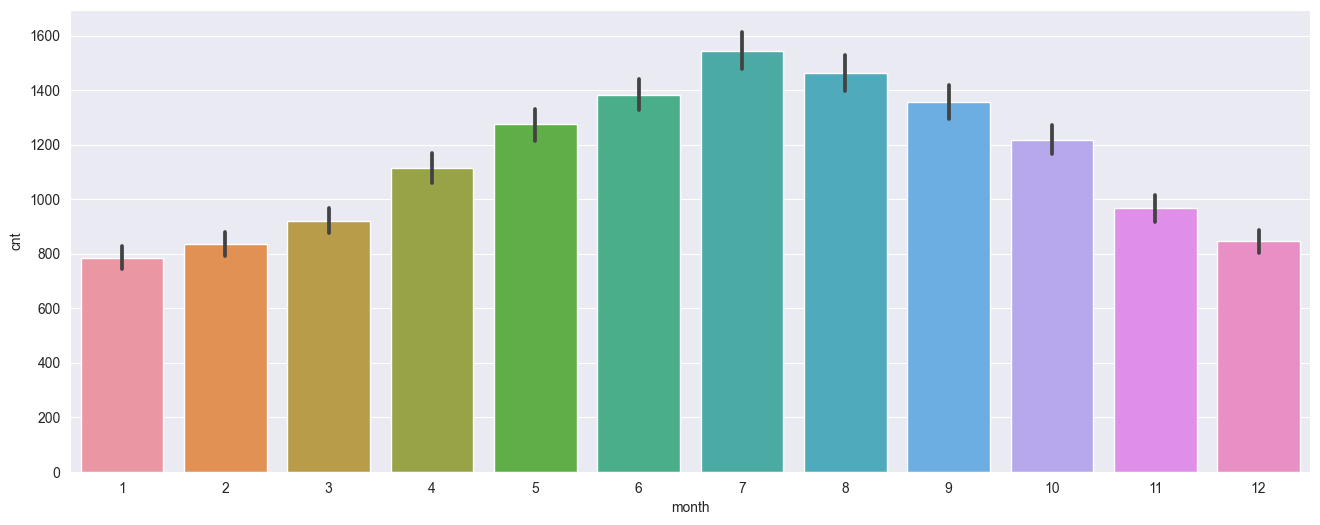

In [180]:
# with barplot
plt.figure(figsize=(16, 6))
sns.barplot(x="month", y="cnt", data=df);

### 10.Plot bike shares by hours on (holidays, weekend, season)

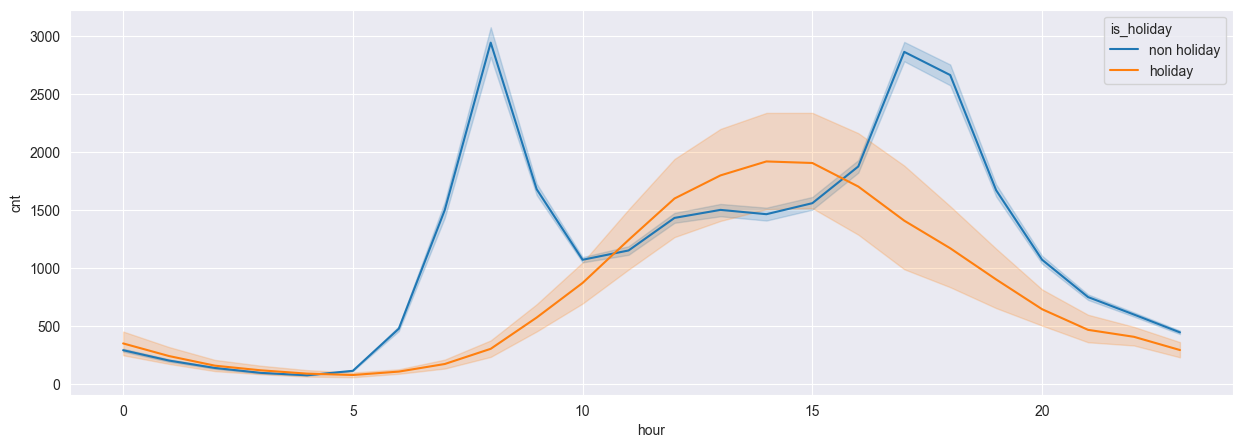

In [181]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='hour', y='cnt', data=df, hue='is_holiday');
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='is_holiday', labels= is_holiday.values(), alignment='left', handles=handles );



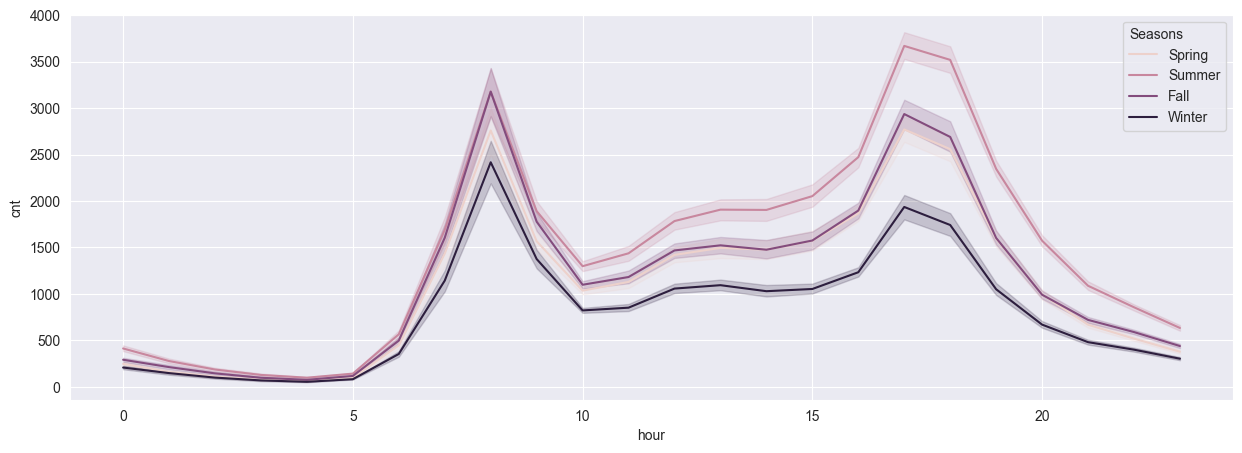

In [182]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(15, 5))

ax = sns.lineplot(x='hour', y='cnt', data=df, hue='season');
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Seasons', labels= season_list.values(), alignment='left', handles=handles );

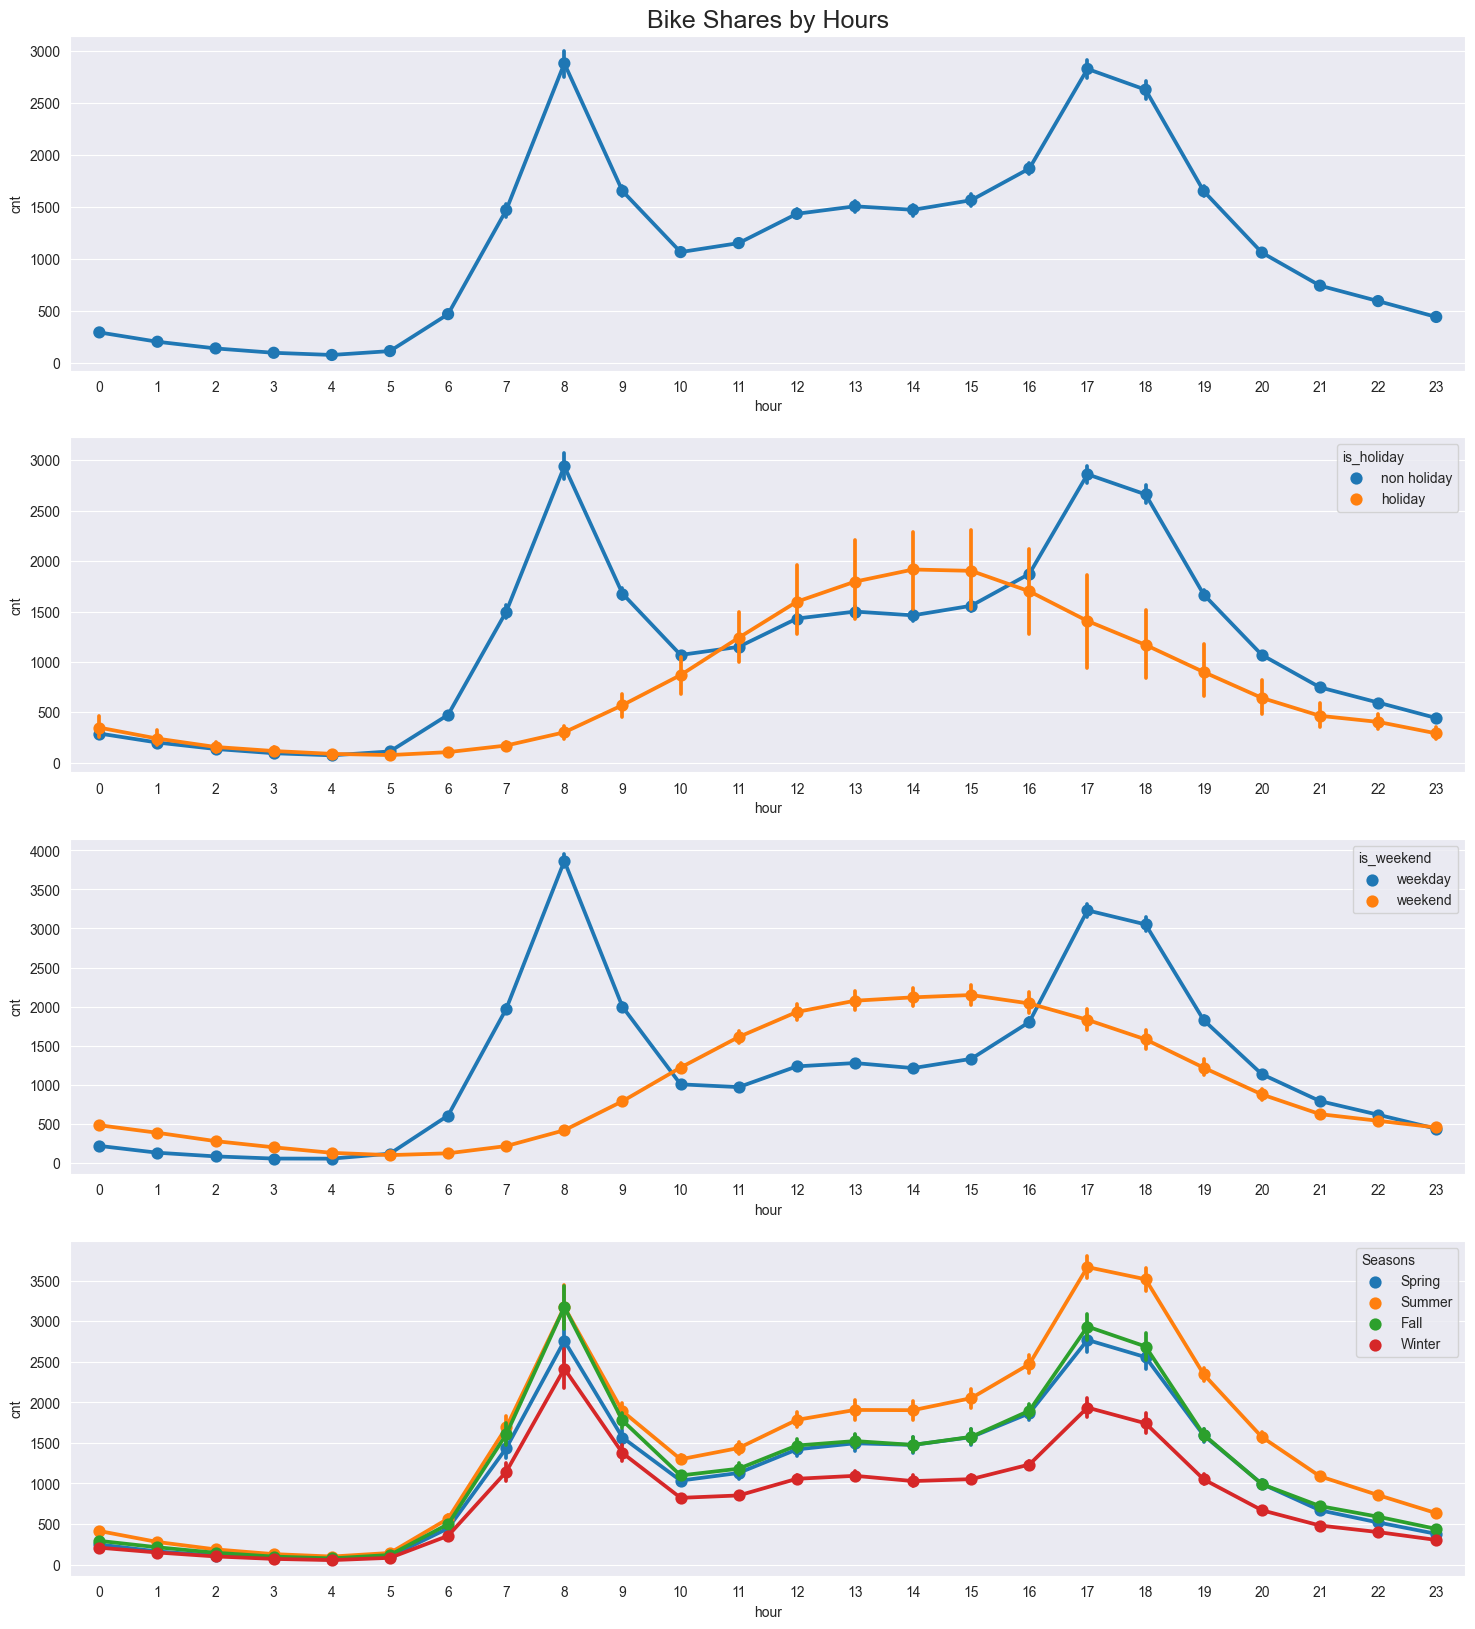

In [183]:
# with pointplot

fig, axes = plt.subplots(nrows=4, figsize=(18, 20))

sns.pointplot(data=df, x='hour', y='cnt', ax=axes[0])
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=axes[1])
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=axes[2])
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=axes[3])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(title='is_holiday', labels= is_holiday.values(), alignment='left', handles=handles )
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(title='is_weekend', labels= is_weekend.values(), alignment='left', handles=handles)
handles, labels = axes[3].get_legend_handles_labels()
axes[3].legend(title='Seasons', labels= season_list.values(), alignment='left', handles=handles )
axes[0].set_title('Bike Shares by Hours', fontdict={'fontsize':18});

### 11.Plot bike shares based on whether it is a holiday or not
- You may want to see whether it is a holiday or not

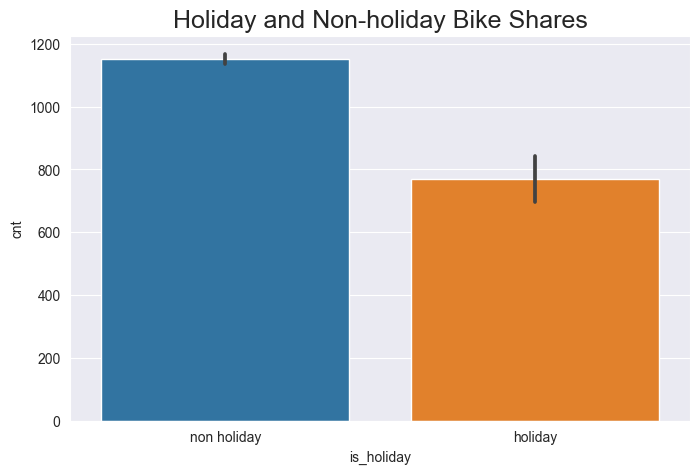

In [184]:
# with barplot
plt.figure(figsize=(8, 5))

ax = sns.barplot(x='is_holiday', y="cnt", data=df)
ax.set_xticklabels(is_holiday.values())
ax.set_title('Holiday and Non-holiday Bike Shares', fontdict={'fontsize':18});

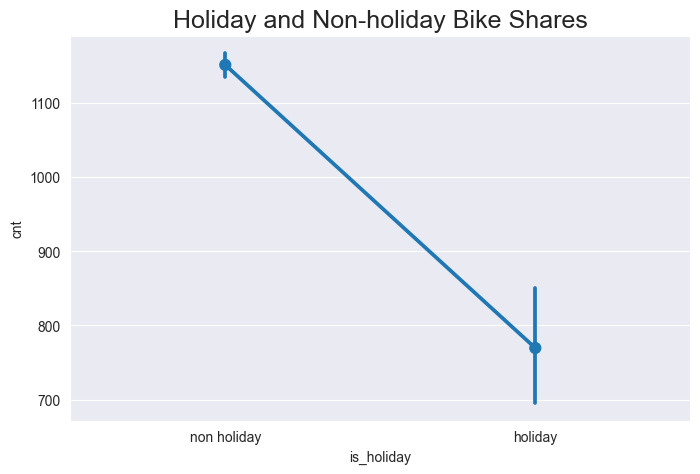

In [185]:
# with pointplot
plt.figure(figsize=(8, 5))

ax = sns.pointplot(x="is_holiday", y="cnt", data=df);
ax.set_xticklabels(is_holiday.values())
ax.set_title('Holiday and Non-holiday Bike Shares', fontdict={'fontsize':18});

### 12.Plot bike shares by day of month

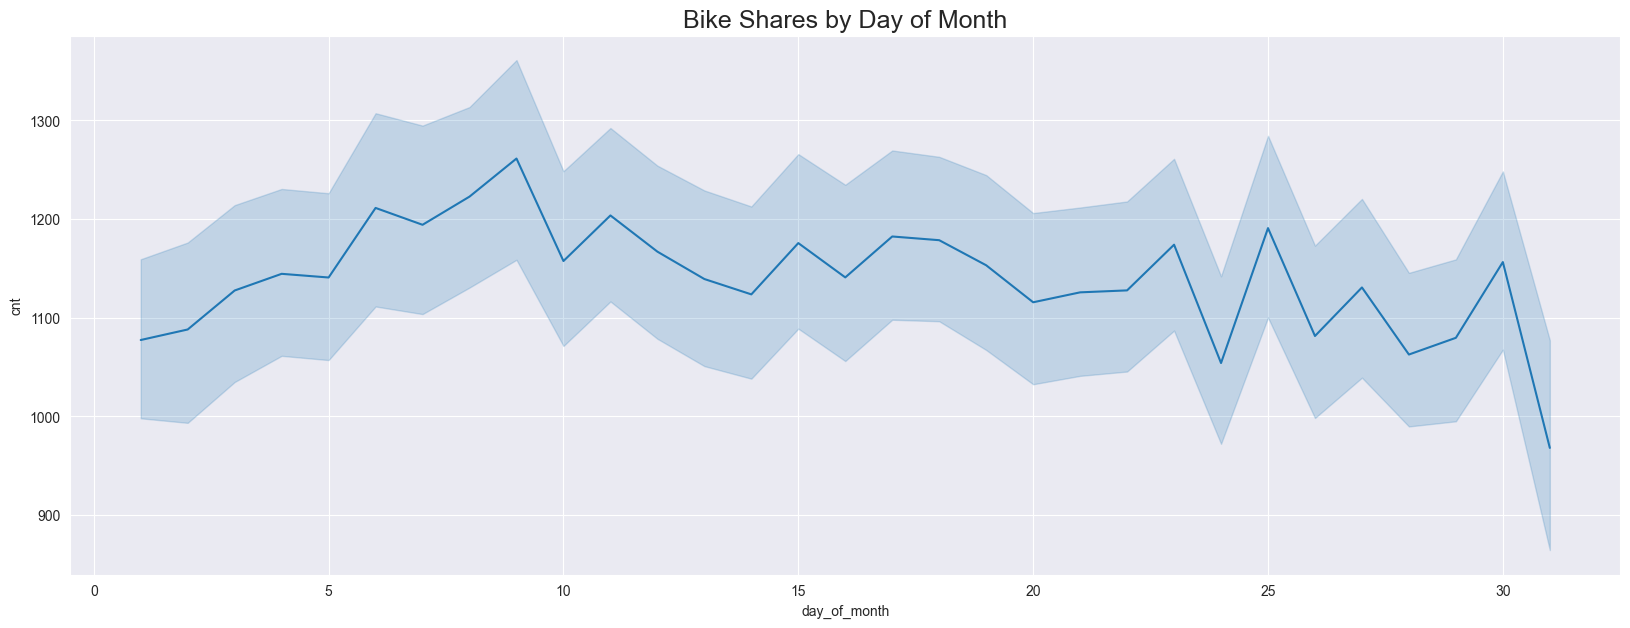

In [186]:
#with lineplot
plt.figure(figsize=(20, 7))
ax = sns.lineplot(x='day_of_month', y='cnt', data=df)
ax.set_title('Bike Shares by Day of Month', fontdict={'fontsize':18});


### 13.Plot bike shares by year
### Plot bike shares on holidays by seasons

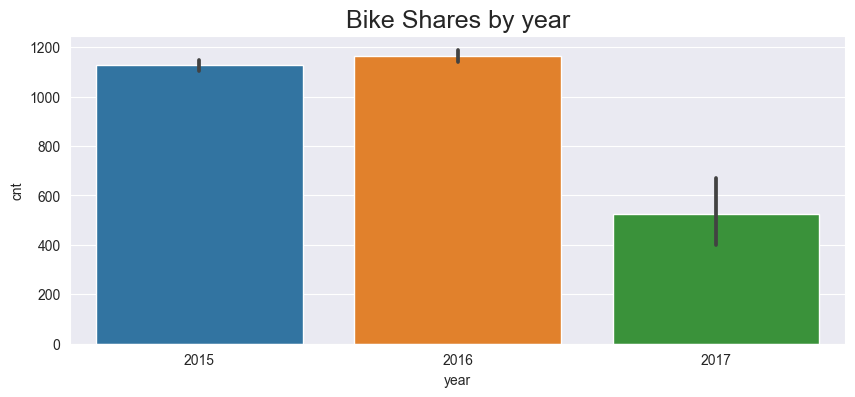

In [187]:
# with barplot
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='year', y='cnt', data=df)
ax.set_title('Bike Shares by year', fontdict={'fontsize':18});

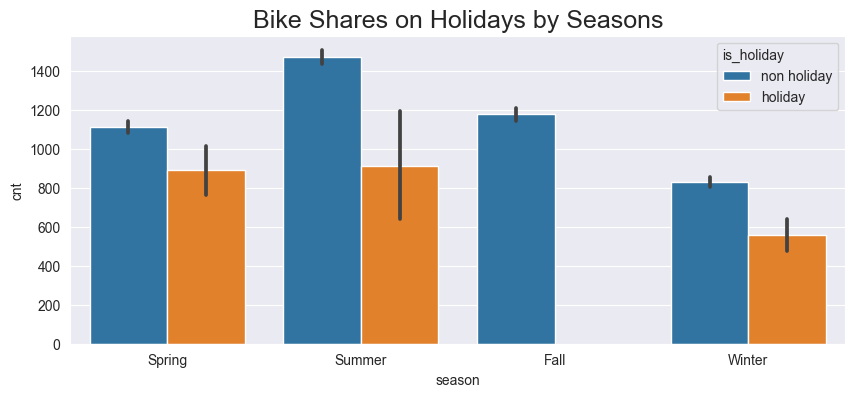

In [188]:
# with barplot
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='season', y='cnt', hue= 'is_holiday', data=df)
ax.set_title('Bike Shares on Holidays by Seasons', fontdict={'fontsize':18})
ax.set_xticklabels(season_list.values(), rotation=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='is_holiday', labels= is_holiday.values(), alignment='left', handles=handles );

### 14.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

,is_weekend,cnt
0,0.0,15048216
1,1.0,4857756


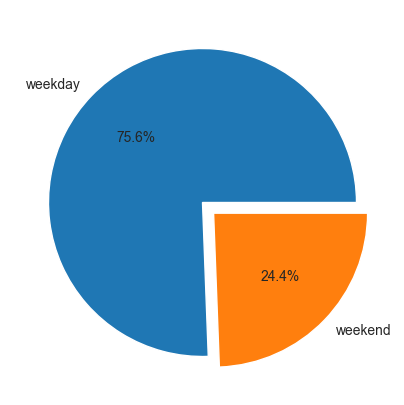

In [189]:
# pie chart
df2 = pd.DataFrame(df.groupby('is_weekend')['cnt'].sum()).reset_index()
fig, ax = plt.subplots(figsize=(5, 5))

explode=(0, 0.1)

ax.pie(x=df2.cnt, 
       labels=is_weekend.values(), 
       autopct='%.1f%%',
       explode=explode
       )

df2

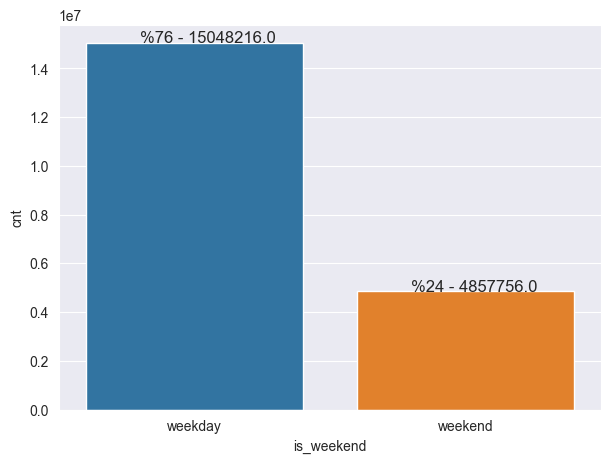

In [190]:
# with countplot
plt.figure(figsize=(7, 5))

ax=sns.barplot(data=df2, y='cnt', x='is_weekend')
ax.set_xticklabels(is_weekend.values())


for bar in ax.patches: 
        ax.annotate("%" + str(round(100*bar.get_height()/sum(df2['cnt']))) + ' - ' + str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10),
                    size=12)



### Plot the distribution of weather code by seasons

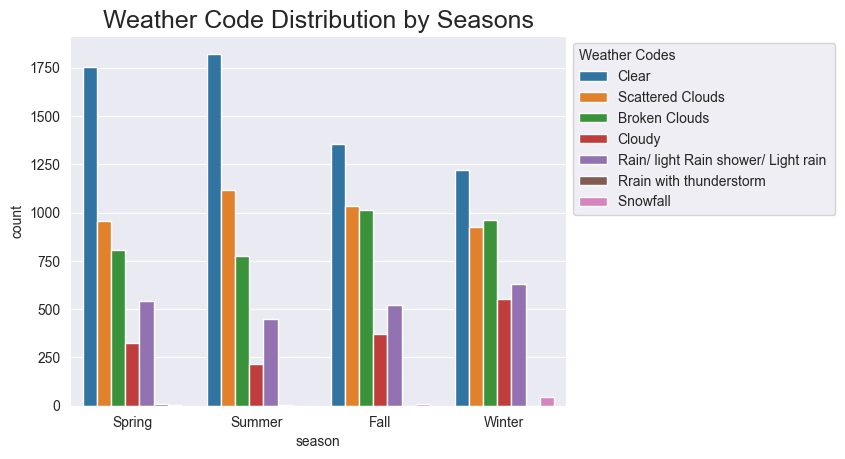

In [191]:
# with countplot
ax = sns.countplot(data=df, x='season', hue='weather_code')
ax.set_title('Weather Code Distribution by Seasons', fontdict={'fontsize':18})
ax.set_xticklabels(season_list.values(), rotation=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Weather Codes', labels= weather_list.values(), alignment='left', handles=handles, bbox_to_anchor=(1,1) );

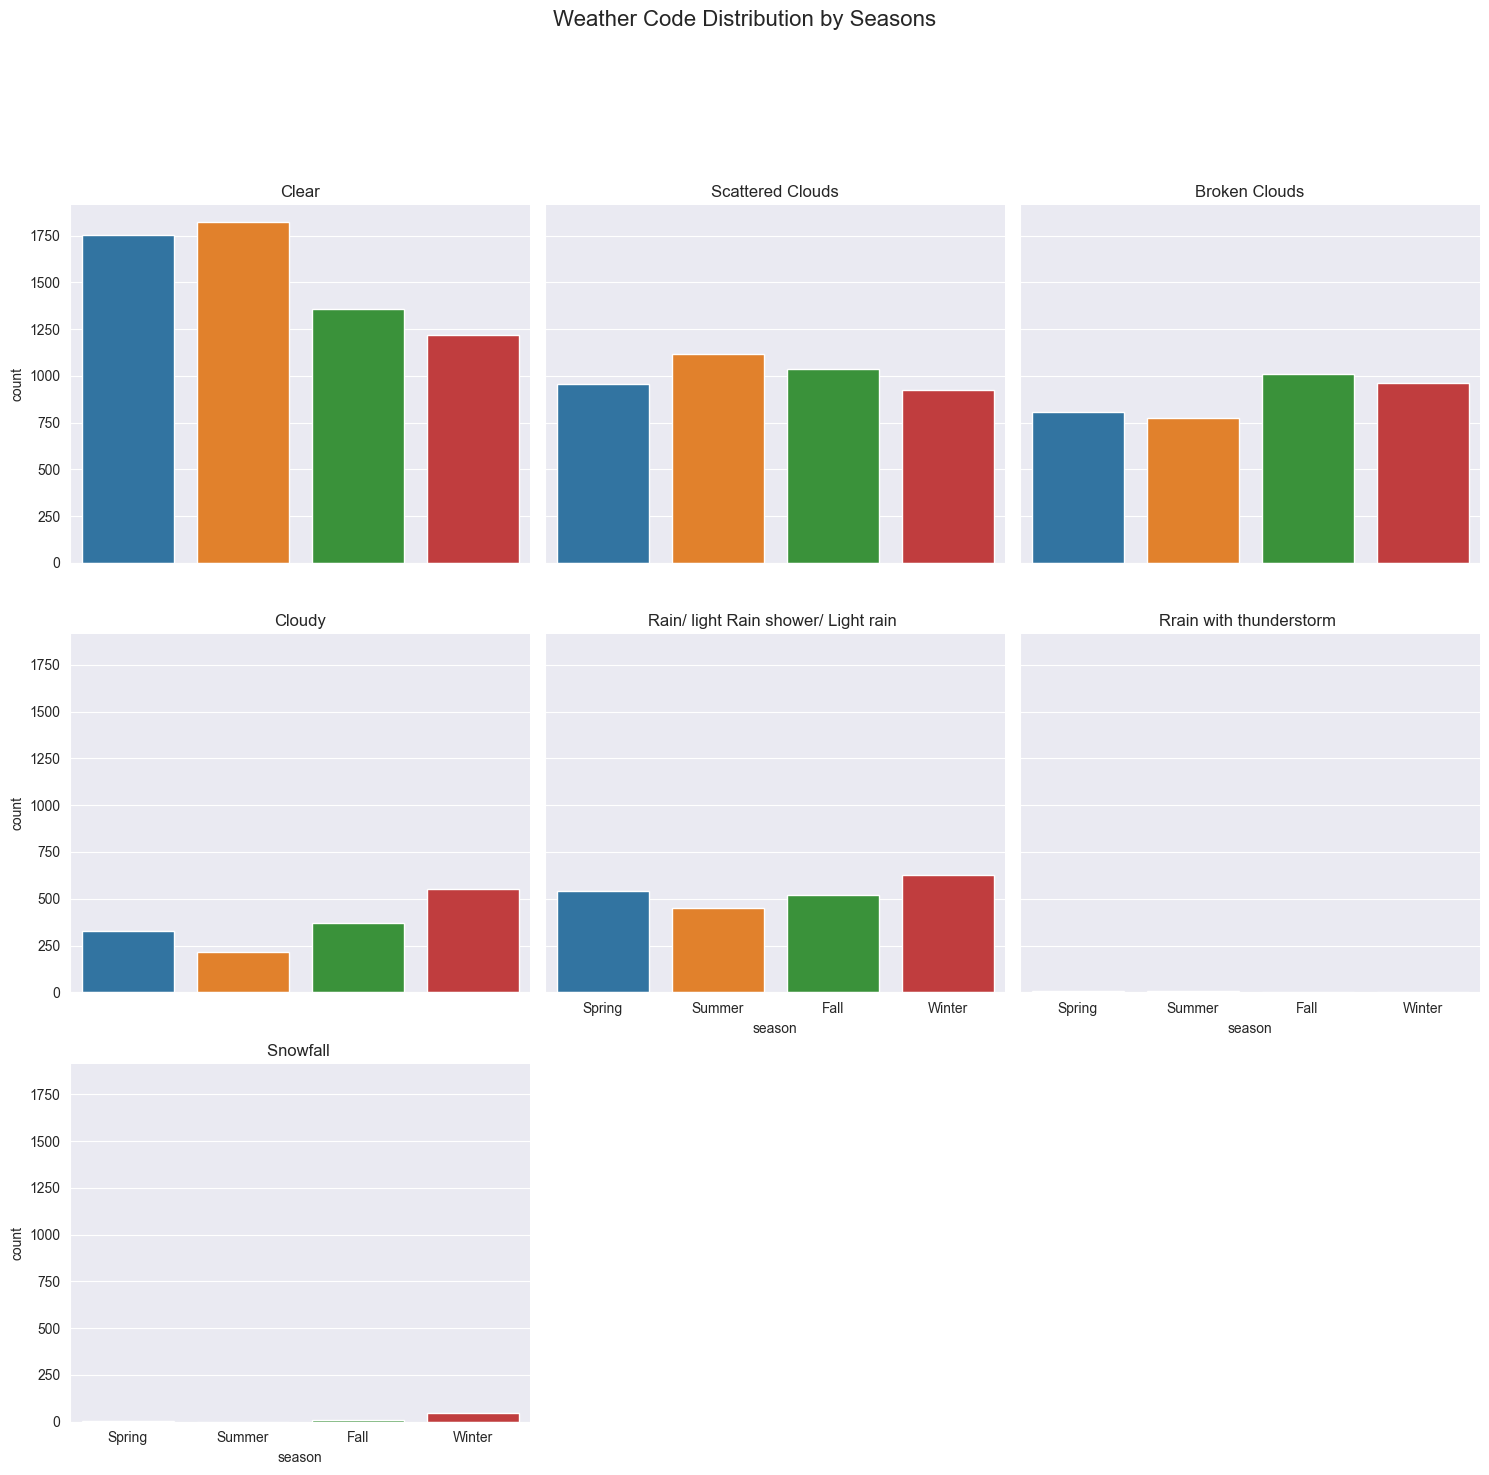

In [155]:
# with catplot
ax = sns.catplot(data=df, x='season', col='weather_code', kind='count', col_wrap=3)
i=0
# Set the titles for each plot
plt.subplots_adjust(top=0.85, hspace = 0.2 ) 
plt.suptitle('Weather Code Distribution by Seasons', fontsize=16)
for axx in ax.axes.flat:
        title = list(weather_list.values())[:-1][i]
        axx.set_title(title)
        axx.set_xticklabels(season_list.values(), rotation=0)
        i=i+1
